In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c61af87d6e3a4df9aecff8cdfe6002ca',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-11-14T11:55:26.282Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9226}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12473, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd 
pd.set_option('display.max.columns',None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.994854e+07,1.994854e+07,False,NaN,1,NaN,NaN,None,2025-11-14T11:53:00.000Z,95934.005579,1.122796e+11,51.8448,-1.163895,-6.847733,-4.437458,-14.368733,-16.687126,-18.339859,1.913743e+12,59.0299,2.014614e+12,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
1,1027,Ethereum,ETH,ethereum,11146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206964e+08,1.206964e+08,True,NaN,2,NaN,NaN,None,2025-11-14T11:53:00.000Z,3130.601137,5.281203e+10,35.0835,-1.761405,-10.728445,-3.858173,-23.752493,-30.948848,-28.737378,3.778521e+11,11.6549,3.778521e+11,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
2,825,Tether USDt,USDT,tether,158287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.840651e+11,1.869128e+11,True,NaN,3,NaN,NaN,None,2025-11-14T11:53:00.000Z,0.999502,1.826471e+11,36.1759,-0.023639,-0.025331,-0.008707,-0.120626,-0.088046,-0.125163,1.839734e+11,5.6747,1.868198e+11,None,2025-11-14T11:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-14 16:55:27.258265
3,52,XRP,XRP,xrp,1757,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.010720e+10,9.998577e+10,False,NaN,4,NaN,NaN,None,2025-11-14T11:53:00.000Z,2.266226,7.632915e+09,29.7621,-1.073923,-9.196176,3.625937,-9.200073,-24.377105,-27.245946,1.362165e+11,4.2016,2.266226e+11,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
4,1839,BNB,BNB,bnb,2964,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377371e+08,1.377371e+08,1.377371e+08,False,NaN,5,NaN,NaN,None,2025-11-14T11:53:00.000Z,907.131607,3.586894e+09,46.5415,-0.839067,-6.165446,-3.865519,-23.457330,-1.499827,9.345433,1.249456e+11,3.8540,1.249456e+11,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
5,5426,Solana,SOL,solana,1049,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.540291e+08,6.139616e+08,True,NaN,6,5.252369e+08,7.375732e+10,None,2025-11-14T11:53:00.000Z,140.426772,8.448335e+09,44.1828,-1.320256,-10.196081,-8.567109,-30.832330,-40.420832,-24.732988,7.780052e+10,2.3998,8.621664e+10,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
6,3408,USDC,USDC,usd-coin,34492,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.560405e+10,7.560405e+10,False,NaN,7,6.090122e+10,6.089494e+10,None,2025-11-14T11:53:00.000Z,0.999897,2.245807e+10,40.5023,-0.016874,-0.001503,0.003854,0.009427,-0.003054,-0.007499,7.559625e+10,2.3318,7.559625e+10,None,2025-11-14T11:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-14 16:55:27.258265
7,1958,TRON,TRX,tron,1259,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466933e+10,9.466933e+10,True,NaN,8,9.466789e+10,2.769649e+10,None,2025-11-14T11:53:00.000Z,0.292565,1.114889e+09,52.4056,-0.335188,-1.941701,2.774801,-8.171220,-15.351237,-16.540720,2.769691e+10,0.8543,2.769691e+10,None,2025-11-14T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:55:27.258265
8,74,Dogecoin,DOGE,dogecoin,1346,2013-12-

In [5]:


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c61af87d6e3a4df9aecff8cdfe6002ca',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\ibrahim\data analyst\6. Pandas\API.csv'):
        df.to_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', mode ='a', header=False)

In [6]:
import os 
from time import time 
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 min
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [25]:
df72 = pd.read_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.994854e+07,1.994854e+07,False,NaN,1,NaN,NaN,NaN,2025-11-14T11:20:00.000Z,96483.356364,1.158270e+11,57.6713,-0.483678,-6.394466,-3.515804,-13.901786,-16.119819,-17.956415,1.924702e+12,59.0147,2.026150e+12,NaN,2025-11-14T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:22:13.610717
1,1,1027,Ethereum,ETH,ethereum,11146,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206964e+08,1.206964e+08,True,NaN,2,NaN,NaN,NaN,2025-11-14T11:20:00.000Z,3161.055681,5.393674e+10,41.1090,-0.375191,-9.904629,-2.299859,-22.969320,-30.293643,-28.501159,3.815279e+11,11.6983,3.815279e+11,NaN,2025-11-14T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:22:13.610717
2,2,825,Tether USDt,USDT,tether,158276,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.840651e+11,1.869128e+11,True,NaN,3,NaN,NaN,NaN,2025-11-14T11:20:00.000Z,0.999794,1.852072e+11,37.4983,0.009212,-0.009447,0.020022,-0.111690,-0.061031,-0.088490,1.840273e+11,5.6426,1.868744e+11,NaN,2025-11-14T11:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-14 16:22:13.610717
3,3,52,XRP,XRP,xrp,1757,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.010720e+10,9.998577e+10,False,NaN,4,NaN,NaN,NaN,2025-11-14T11:21:00.000Z,2.276447,7.569779e+09,28.7932,-0.296016,-9.188655,4.651364,-8.680432,-23.892372,-27.212223,1.368308e+11,4.1955,2.276447e+11,NaN,2025-11-14T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:22:13.610717
4,4,1839,BNB,BNB,bnb,2964,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377371e+08,1.377371e+08,1.377371e+08,False,NaN,5,NaN,NaN,NaN,2025-11-14T11:21:00.000Z,910.742596,3.545804e+09,44.5212,-0.257532,-5.663666,-3.381516,-23.011212,-1.013255,9.476186,1.254430e+11,3.8463,1.254430e+11,NaN,2025-11-14T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:22:13.610717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,32196,Hyperliquid,HYPE,hyperliquid,198,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",9.995333e+08,3.366852e+08,9.995333e+08,False,NaN,11,333931719.0,1.228020e+10,NaN,2025-11-14T11:57:00.000Z,36.774586,5.326485e+08,25.4580,-1.853175,-5.917071,-5.406312,-9.248114,-31.009181,-20.954033,1.238146e+10,0.3819,3.675742e+10,NaN,2025-11-14T11:57:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-11-14 16:59:29.565192
101,11,1975,Chainlink,LINK,chainlink,2145,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1.000000e+09,6.968500e+08,1.000000e+09,False,NaN,12,NaN,NaN,NaN,2025-11-14T11:57:00.000Z,14.150204,1.180041e+09,37.3488,-0.832024,-10.219648,-3.714203,-24.388133,-39.571257,-34.152509,9.860569e+09,0.3042,1.415020e+10,NaN,2025-11-14T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-11-14 16:59:29.565192
102,12,1831,Bitcoin Cash,BCH,bitcoin-cash,1092,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.995289e+07,1.995289e+07,False,NaN,13,NaN,NaN,NaN,2025-11-14

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.994854e+07,1.994854e+07,False,NaN,1,NaN,NaN,None,2025-11-14T11:57:00.000Z,95912.556056,1.175012e+11,58.7676,-0.966797,-6.789461,-4.409229,-14.347789,-16.703796,-18.372144,1.913315e+12,59.0167,2.014164e+12,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
1,1027,Ethereum,ETH,ethereum,11146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206964e+08,1.206964e+08,True,NaN,2,NaN,NaN,None,2025-11-14T11:57:00.000Z,3130.453103,5.350361e+10,35.8372,-1.531676,-10.670810,-3.957049,-23.682267,-30.946711,-28.718212,3.778343e+11,11.6544,3.778343e+11,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
2,825,Tether USDt,USDT,tether,158287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.840651e+11,1.869128e+11,True,NaN,3,NaN,NaN,None,2025-11-14T11:57:00.000Z,0.999781,1.867295e+11,39.7283,0.000205,-0.019640,-0.004284,-0.100679,-0.068649,-0.139802,1.840248e+11,5.6763,1.868719e+11,None,2025-11-14T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-14 16:59:29.565192
3,52,XRP,XRP,xrp,1757,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.010720e+10,9.998577e+10,False,NaN,4,NaN,NaN,None,2025-11-14T11:57:00.000Z,2.262989,7.638909e+09,29.8459,-1.222257,-9.230558,3.399270,-9.326208,-24.558230,-27.258956,1.360220e+11,4.1956,2.262989e+11,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
4,1839,BNB,BNB,bnb,2964,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377371e+08,1.377371e+08,1.377371e+08,False,NaN,5,NaN,NaN,None,2025-11-14T11:58:00.000Z,907.460033,3.598382e+09,46.9115,-0.682275,-6.141089,-3.781205,-23.538764,-1.426876,9.582643,1.249909e+11,3.8624,1.249909e+11,None,2025-11-14T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
5,5426,Solana,SOL,solana,1049,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.540291e+08,6.139616e+08,True,NaN,6,5.252369e+08,7.360837e+10,None,2025-11-14T11:57:00.000Z,140.143187,8.480717e+09,44.7269,-1.423299,-10.298748,-8.900953,-30.966123,-40.691314,-24.689657,7.764340e+10,2.3949,8.604253e+10,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
6,3408,USDC,USDC,usd-coin,34493,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.560405e+10,7.560405e+10,False,NaN,7,6.090122e+10,6.091762e+10,None,2025-11-14T11:57:00.000Z,1.000269,2.281543e+10,42.6270,0.035357,0.029958,0.036331,0.025380,0.041564,-0.014773,7.562441e+10,2.3327,7.562441e+10,None,2025-11-14T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-14 16:59:29.565192
7,1958,TRON,TRX,tron,1259,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466933e+10,9.466933e+10,True,NaN,8,9.466789e+10,2.767264e+10,None,2025-11-14T11:57:00.000Z,0.292313,1.118949e+09,52.9567,-0.460137,-2.034663,2.719251,-8.192288,-15.424112,-16.484469,2.767306e+10,0.8536,2.767306e+10,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
8,74,Dogecoin,DOGE,dogecoin,1346,2013-12-15T0

In [29]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19948537.00000,19948537.00000,False,NaN,1,NaN,NaN,None,2025-11-14T11:57:00.000Z,95912.55606,117501222671.00711,58.76760,-0.96680,-6.78946,-4.40923,-14.34779,-16.70380,-18.37214,1913315173244.69629,59.01670,2014163677172.85010,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
1,1027,Ethereum,ETH,ethereum,11146,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120696353.18379,120696353.18379,True,NaN,2,NaN,NaN,None,2025-11-14T11:57:00.000Z,3130.45310,53503610203.70902,35.83720,-1.53168,-10.67081,-3.95705,-23.68227,-30.94671,-28.71821,377834273392.23523,11.65440,377834273392.23999,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
2,825,Tether USDt,USDT,tether,158287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184065108793.92068,186912846198.86810,True,NaN,3,NaN,NaN,None,2025-11-14T11:57:00.000Z,0.99978,186729501662.49750,39.72830,0.00021,-0.01964,-0.00428,-0.10068,-0.06865,-0.13980,184024781642.06564,5.67630,186871895131.16000,None,2025-11-14T11:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-14 16:59:29.565192
3,52,XRP,XRP,xrp,1757,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60107199237.00000,99985774127.00000,False,NaN,4,NaN,NaN,None,2025-11-14T11:57:00.000Z,2.26299,7638908529.10155,29.84590,-1.22226,-9.23056,3.39927,-9.32621,-24.55823,-27.25896,136021951834.34340,4.19560,226298935170.84000,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
4,1839,BNB,BNB,bnb,2964,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137737064.28000,137737064.28000,137737064.28000,False,NaN,5,NaN,NaN,None,2025-11-14T11:58:00.000Z,907.46003,3598382207.71114,46.91150,-0.68227,-6.14109,-3.78120,-23.53876,-1.42688,9.58264,124990880869.74655,3.86240,124990880869.75000,None,2025-11-14T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
5,5426,Solana,SOL,solana,1049,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,554029083.23845,613961573.31340,True,NaN,6,525236893.30000,73608372298.65549,None,2025-11-14T11:57:00.000Z,140.14319,8480716806.14156,44.72690,-1.42330,-10.29875,-8.90095,-30.96612,-40.69131,-24.68966,77643401565.10265,2.39490,86042531745.21001,None,2025-11-14T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-14 16:59:29.565192
6,3408,USDC,USDC,usd-coin,34493,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75604049864.85103,75604049864.85103,False,NaN,7,60901219650.23000,60917618311.16648,None,2025-11-14T11:57:00.000Z,1.00027,22815432120.53875,42.62700,0.03536,0.02996,0.03633,0.02538,0.04156,-0.01477,75624407506.06543,2.33270,75624407506.07001,None,2025-11-14T11:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-14 16:59:29.565192
7,1958,TRON,TRX,tron,1259,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94669328674.31929,94669330513.25520,True,NaN,8,94667886298.42999,27672640995.23707,None,2025-11-14T11:57:00.000Z,0.29231,1118948952.19779,52.95670,-0.46014,-2.03466,2.

In [33]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.96680,-6.78946,-4.40923,-14.34779,-16.70380,-18.37214
Ethereum,-1.53168,-10.67081,-3.95705,-23.68227,-30.94671,-28.71821
Tether USDt,0.00021,-0.01964,-0.00428,-0.10068,-0.06865,-0.13980
XRP,-1.22226,-9.23056,3.39927,-9.32621,-24.55823,-27.25896
BNB,-0.68227,-6.14109,-3.78120,-23.53876,-1.42688,9.58264
Solana,-1.42330,-10.29875,-8.90095,-30.96612,-40.69131,-24.68966
USDC,0.03536,0.02996,0.03633,0.02538,0.04156,-0.01477
TRON,-0.46014,-2.03466,2.71925,-8.19229,-15.42411,-16.48447
Dogecoin,-1.07576,-8.12352,-1.39445,-20.17354,-39.15571,-29.23804


In [35]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.96680
              quote.USD.percent_change_24h    -6.78946
              quote.USD.percent_change_7d     -4.40923
              quote.USD.percent_change_30d   -14.34779
              quote.USD.percent_change_60d   -16.70380
                                                ...   
UNUS SED LEO  quote.USD.percent_change_24h     1.01366
              quote.USD.percent_change_7d     -0.98167
              quote.USD.percent_change_30d    -4.75366
              quote.USD.percent_change_60d    -3.60324
              quote.USD.percent_change_90d    -2.93941
Length: 90, dtype: float64

In [37]:
type(df4)

pandas.core.series.Series

In [39]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.96680
             quote.USD.percent_change_24h  -6.78946
             quote.USD.percent_change_7d   -4.40923
             quote.USD.percent_change_30d -14.34779
             quote.USD.percent_change_60d -16.70380
...                                             ...
UNUS SED LEO quote.USD.percent_change_24h   1.01366
             quote.USD.percent_change_7d   -0.98167
             quote.USD.percent_change_30d  -4.75366
             quote.USD.percent_change_60d  -3.60324
             quote.USD.percent_change_90d  -2.93941

[90 rows x 1 columns]

In [41]:
type(df5)

pandas.core.frame.DataFrame

In [43]:
df5.count()

values    90
dtype: int64

In [51]:

#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.96680
1,Bitcoin,quote.USD.percent_change_24h,-6.78946
2,Bitcoin,quote.USD.percent_change_7d,-4.40923
3,Bitcoin,quote.USD.percent_change_30d,-14.34779
4,Bitcoin,quote.USD.percent_change_60d,-16.70380
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,1.01366
86,UNUS SED LEO,quote.USD.percent_change_7d,-0.98167
87,UNUS SED LEO,quote.USD.percent_change_30d,-4.75366
88,UNUS SED LEO,quote.USD.percent_change_60d,-3.60324


In [53]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.96680
1,Bitcoin,quote.USD.percent_change_24h,-6.78946
2,Bitcoin,quote.USD.percent_change_7d,-4.40923
3,Bitcoin,quote.USD.percent_change_30d,-14.34779
4,Bitcoin,quote.USD.percent_change_60d,-16.70380
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,1.01366
86,UNUS SED LEO,quote.USD.percent_change_7d,-0.98167
87,UNUS SED LEO,quote.USD.percent_change_30d,-4.75366
88,UNUS SED LEO,quote.USD.percent_change_60d,-3.60324


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.96680
1,Bitcoin,24h,-6.78946
2,Bitcoin,7d,-4.40923
3,Bitcoin,30d,-14.34779
4,Bitcoin,60d,-16.70380
...,...,...,...
85,UNUS SED LEO,24h,1.01366
86,UNUS SED LEO,7d,-0.98167
87,UNUS SED LEO,30d,-4.75366
88,UNUS SED LEO,60d,-3.60324


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

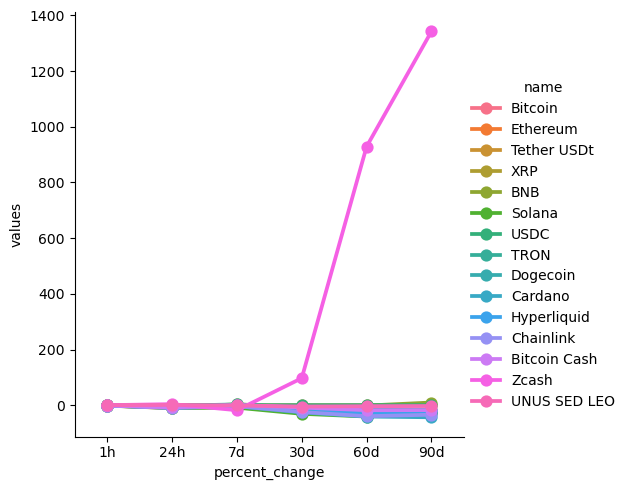

In [58]:

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [61]:

# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,95912.55606,2025-11-14 16:59:29.565192


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

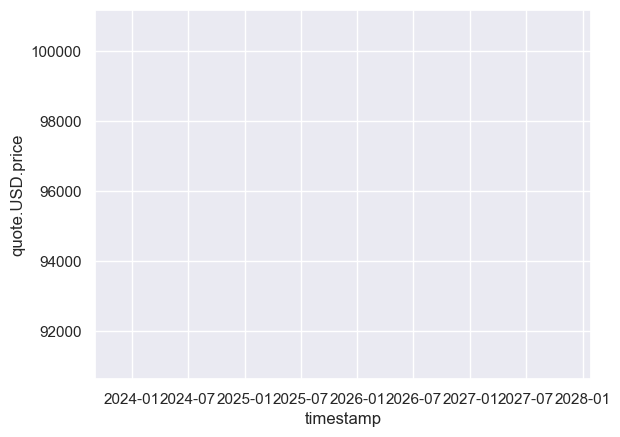

In [63]:

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)